In [29]:
import matplotlib.pyplot as plt
from utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every examples
    
    """

    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        
        idx[i] = np.argmin(distance)
    
    return idx

In [31]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        
        centroids[k] = np.mean(points, axis = 0)
        
    return centroids

In [32]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    """
    
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

In [33]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    
    for i in range(max_iters):
        
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        
        idx = find_closest_centroids(X, centroids)
        
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [34]:
original_img = plt.imread('3069128.png')

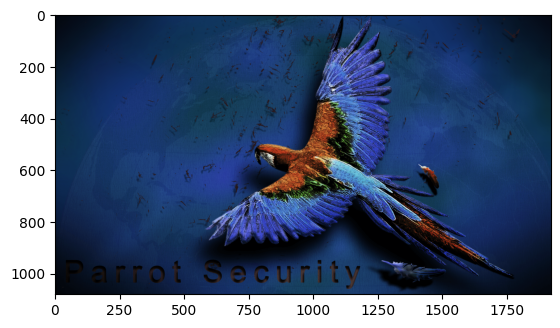

In [35]:
plt.imshow(original_img)

In [36]:
print('Shape of the original_img : ', original_img.shape)

Shape of the original_img :  (1080, 1920, 4)


In [37]:
X_img = np.reshape(original_img,(original_img.shape[0] * original_img.shape[1], 4))

In [45]:
K = 6
max_iters = 3

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters )


K-Means iteration 0/2
K-Means iteration 1/2
K-Means iteration 2/2


<Figure size 800x600 with 0 Axes>

In [46]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (2073600,)
Closest centroid for the first five elements: [5 5 5 5 5]


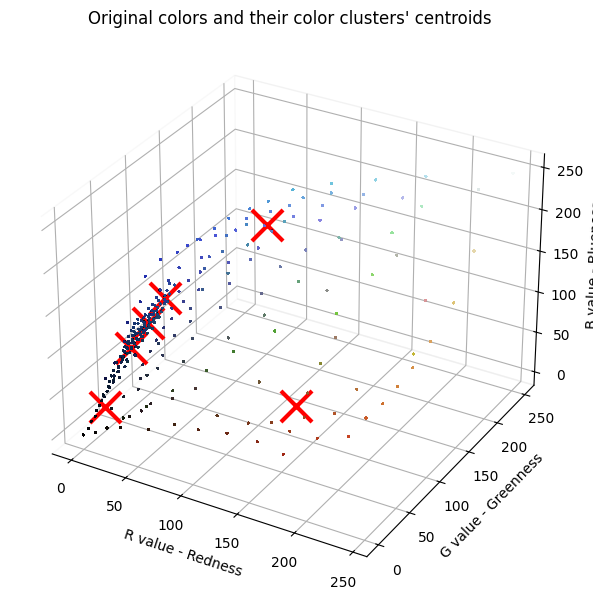

In [47]:
plot_kMeans_RGB(X_img, centroids, idx, K)

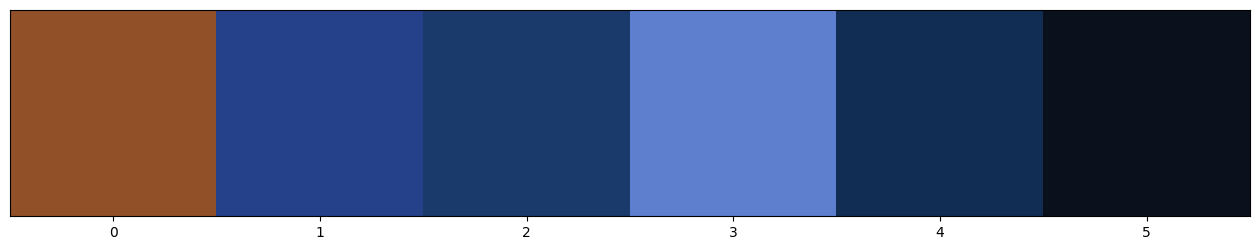

In [48]:
show_centroid_colors(centroids)

In [49]:
idx = find_closest_centroids(X_img, centroids)

In [50]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

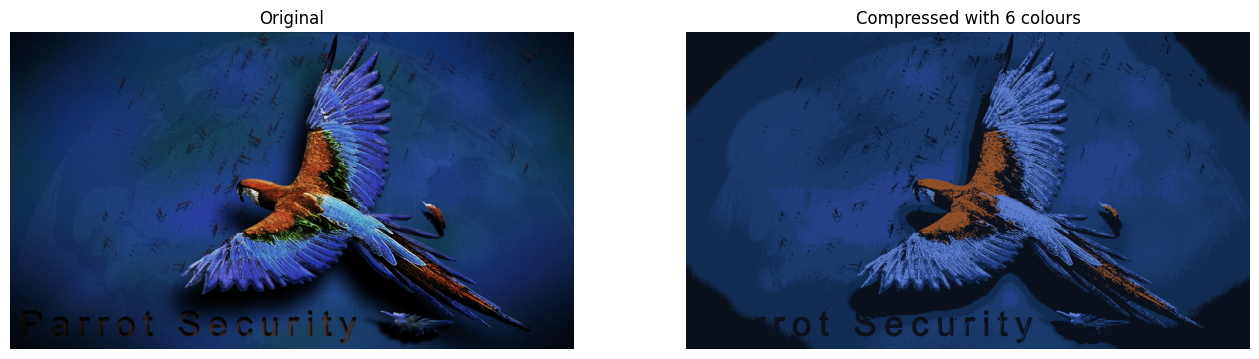

In [51]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()



ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()